In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [80]:
df=pd.read_excel('lleg_nacionalidad_2023.xls',header=4)
df=df.iloc[15:91,1:] # to start with data related to countries where foreigners are from and stop to the last row related to foreign entry
df=df.set_index('Unnamed: 1')
df.head()

,TOTAL,ENE.,FEB.,MAR.,ABR.,MAY.,JUN.,JUL.,AGO.,SEP.,OCT.,NOV.,DIC.
Unnamed: 1,,,,,,,,,,,,,
Canadá,636259.243376,119173.331155,117068.154927,126327.479617,96194.194514,45609.176536,30693.097316,38961.953557,36902.719453,25329.136301,0,0,0
Estados Unidos,1999984.594412,174815.85983,202764.338059,263369.327626,229463.252562,215038.185274,271101.606353,288164.080137,221999.026145,133268.918424,0,0,0
México,74806.319773,5771.315779,5657.770014,7392.01091,8854.859316,9989.843128,8384.267253,10612.617904,10183.442724,7960.192745,0,0,0
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMERICA CENTRAL Y EL CARIBE,484239.490981,30349.595471,31244.347777,36909.843985,45000.029071,55079.254505,80287.201992,93530.556624,65624.690202,46213.971354,0,0,0


In [94]:
# remove empty rows and those related to regions instead of countries.
df=df[[type(i)!=float for i in df.index]]       # remove roww where index is np.nan, then a float
df.index=[i.strip() for i in df.index]          # remove spaces around df index values
df=df[[i.isupper()==False for i in df.index]]   # remove rows related to geographic regions
df['Total_percent']=[round(i,2) for i in (df.TOTAL/sum(df.TOTAL))*100]  # proportion of travelers by country of national
df=df[[i!='Otros' for i in df.index]]           # remove rows with data related to 'Others' 
df.tail()

,TOTAL,ENE.,FEB.,MAR.,ABR.,MAY.,JUN.,JUL.,AGO.,SEP.,OCT.,NOV.,DIC.,Total_percent
Rusia,15994.795852,2321.381723,1958.890551,2129.517644,2449.448188,1868.267987,1416.326437,1274.515547,1327.429171,1249.018603,0,0,0,0.32
Suecia,2902.368824,921.345771,775.295203,283.262917,216.823134,136.396075,161.645328,194.573661,102.495082,110.531655,0,0,0,0.06
Suiza,21037.818233,2846.579944,3478.083429,2696.551934,3367.572513,1610.188277,1358.761171,3282.842611,1064.937676,1332.300677,0,0,0,0.42
Ucrania,22617.843773,3779.835041,2796.157173,3065.870674,3241.313486,2607.558839,1935.155015,1600.590246,1770.473361,1820.889938,0,0,0,0.45
Australia,4107.248907,316.998489,303.983663,389.512881,320.451781,302.247679,661.737283,1395.240455,251.212633,165.864042,0,0,0,0.08


In [119]:
df1=df.sort_values('Total_percent',ascending=False).head(10) # select top 20 countries with highest nunber of arrivals

# translate index in English
countries=dict(zip(df1.index,['United States', 'Canada', 'Colombia', 'Puerto Rico', 'Argentina', 'Spain', 'England', 'France', 'Chile', 'Germany', 'Brazil', 'Cuba', 'Haiti', 'Mexico', 'Peru', 'Venezuela', 'Portugal', 'Ecuador', 'Poland', 'Italy']))
df1.index=[countries[i] for i in df1.index]


Text(-0.5, -2.5, 'Source: By Raulin L. Cadet, with data from the Central Bank of the Dominican Republic.')

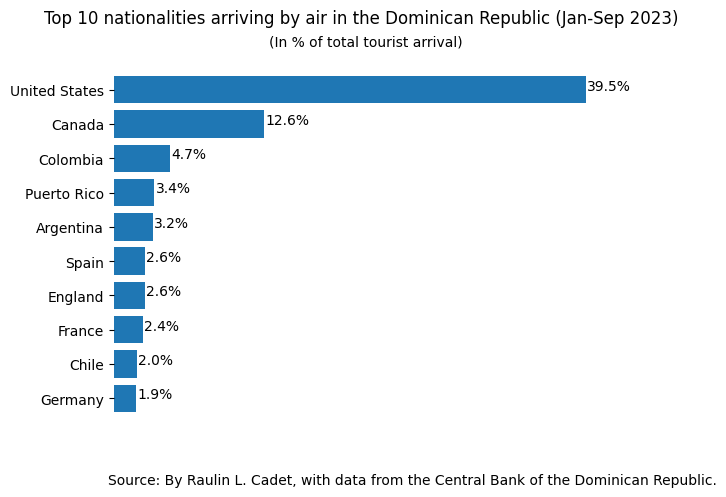

In [149]:
fig=plt.subplot()
# plt.barh(df1.index[::-1],df1.TOTAL[::-1])
for i in range(df1.shape[0]):
    plt.barh(df1.index[::-1][i],df1.Total_percent[::-1][i],color='tab:blue')
    plt.text(df1.Total_percent[::-1][i]+0.1,df1.index[::-1][i],s=str(round(df1.Total_percent[::-1][i],1))+'%')
plt.title('Top 10 nationalities arriving by air in the Dominican Republic (Jan-Sep 2023)',pad=26)
plt.text(13,10.3,s='(In % of total tourist arrival)')
fig.spines[['top','right','bottom','left']].set_visible(False)
fig.set_xticks([])  # Remove x-axis ticks
plt.text(-0.5,-2.5,s='Source: By Raulin L. Cadet, with data from the Central Bank of the Dominican Republic.')


In [113]:
sum(df1['Total_percent'][['United States','Canada','Mexico']])

53.53